# Introduction
> Nama : Rasendra Akbar Satyatama

> Cohort ID: MC004D5Y1124

Pada proyek akhir ini, saya menggunakan dataset mengenai kebiasaan pengeluaran konsumen dan perilaku finansial. Dataset ini memberikan wawasan mendalam terkait pola transaksi dan aktivitas keuangan.

Dataset ini berisi 2,512 sampel data transaksi, mencakup berbagai atribut transaksi, demografi pelanggan, serta pola penggunaan layanan finansial. Setiap entri memberikan informasi komprehensif terkait perilaku transaksi.

Hasil evaluasi model yang saya peroleh dalam mendeteksi anomali transaksi menggunakan metode clustering menunjukkan bahwa konfigurasi terbaik adalah:
"Best K: 4, Best Silhouette Score: 0.8040" dengan menghasilkan 1 kluster yang terindikasi berisi potensi anomali dalam bertransaksi

Metode yang saya gunakan dalam analisis ini meliputi:

✅ Preprocessing dengan VarianceThreshold

✅ Reduksi dimensi menggunakan UMAP

✅ Clustering dengan K-Means++

Detail lengkap mengenai langkah-langkah analisis dapat ditemukan dalam notebook ini, yang telah disusun mengikuti format penyelesaian analisis sesuai standar.

(Terima Kasih) 🙌

# **1. Perkenalan Dataset**


__Pada tahap awal proyek ini, saya memilih dataset tanpa label yang sesuai dengan kriteria berikut:__

_Sumber Dataset:_
Dataset diperoleh dari Kaggle, dengan nama "Bank Transaction Dataset for Fraud Detection", yang dapat diakses melalui tautan berikut:
[Kaggle - Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data)

_Ketentuan Dataset:_

- Tanpa Label: Dataset ini tidak memiliki label atau kelas target, sehingga cocok untuk analisis unsupervised learning, khususnya clustering.
- Jumlah Baris: Dataset ini berisi 2,512 sampel, sehingga cukup besar untuk analisis yang bermakna.
- Tipe Data: Dataset ini memiliki kombinasi data kategorikal dan numerikal, yaitu:
   - Kategorikal: Jenis transaksi (Credit atau Debit), kanal transaksi (Online, ATM, Branch), serta kategori pekerjaan pelanggan.
   - Numerikal: Jumlah transaksi, saldo akun, durasi transaksi, jumlah login attempts sebelum transaksi, dan lainnya.

-----------------------------------------------------------

### **Deskripsi Dataset**

_Dataset ini memberikan wawasan mendalam tentang perilaku transaksi dan aktivitas keuangan, menjadikannya ideal untuk eksplorasi deteksi fraud dan identifikasi anomali. Dengan 2,512 sampel data transaksi, dataset ini mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan yang relevan untuk analisis keamanan finansial._

Fitur Utama dalam Dataset:
- TransactionID: Identifikasi unik setiap transaksi (alphanumeric).
- AccountID: Identifikasi unik setiap akun dengan berbagai transaksi terkait.
- TransactionAmount: Nilai transaksi dalam satuan mata uang, dari pengeluaran kecil hingga besar.
- TransactionDate: Timestamp transaksi, mencatat tanggal dan waktu transaksi.
- TransactionType: Jenis transaksi (Credit atau Debit).
- Location: Lokasi geografis transaksi (nama kota di AS).
- DeviceID: Identifikasi perangkat yang digunakan untuk melakukan transaksi.
- IP Address: Alamat IPv4 yang terkait dengan transaksi, yang dapat berubah pada beberapa akun.
- MerchantID: Identifikasi unik pedagang, menunjukkan pola transaksi pelanggan dengan pedagang tertentu.
- AccountBalance: Saldo akun setelah transaksi, dengan korelasi logis terhadap jumlah dan jenis transaksi.
- PreviousTransactionDate: Timestamp transaksi sebelumnya dari akun yang sama, membantu analisis frekuensi transaksi.
- Channel: Metode transaksi, seperti Online, ATM, atau Branch.
- CustomerAge: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
- CustomerOccupation: Pekerjaan pemegang akun (Dokter, Insinyur, Mahasiswa, Pensiunan), mencerminkan pola pendapatan.
- TransactionDuration: Durasi transaksi dalam detik, bervariasi berdasarkan jenis transaksi.
- LoginAttempts: Jumlah percobaan login sebelum transaksi terjadi, dengan nilai tinggi mengindikasikan potensi anomali.


# **2. Import Library**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
import umap.umap_ as umap

# **3. Memuat Dataset**

In [84]:
df = pd.read_csv("Dataset_inisiasi.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

> ### Memahami Struktur Data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

##### Dataset ini memiliki 16 kolom dengan tipe data sebagai berikut:

__Object (11 kolom):__ Sebagian besar fitur bersifat kategorikal atau identifikasi unik, seperti TransactionID, AccountID, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation, TransactionDate, PreviousTransactionDate.

__Float64 (2 kolom):__ TransactionAmount dan AccountBalance menunjukkan nilai keuangan dalam transaksi.

__Int64 (3 kolom):__ CustomerAge, TransactionDuration, dan LoginAttempts mewakili data numerik diskrit yang dapat digunakan dalam analisis pola perilaku pelanggan.

Mayoritas kolom bertipe object, menunjukkan perlunya encoding sebelum digunakan dalam model numerik

> ### Menangani Data Hilang & Duplikat

In [86]:
df.duplicated().sum()

0

In [87]:
pd.DataFrame(
    {"Total NaN": df.isnull().sum(),
     "Persentase NaN (%)": df.isnull().mean()*100}
    )

,Total NaN,Persentase NaN (%)
TransactionID,0,0.0
AccountID,0,0.0
TransactionAmount,0,0.0
TransactionDate,0,0.0
TransactionType,0,0.0
Location,0,0.0
DeviceID,0,0.0
IP Address,0,0.0
MerchantID,0,0.0
Channel,0,0.0


__Tidak terdapat data terduplikasi dan missing values pada dataset ini sehingga dilanjutkan ke tahap analisis berikutnya__

> ### Analisis Distribusi dan Korelasi

In [88]:
categorical = df.select_dtypes(include='object')
df[categorical.columns].describe()

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX000001,AC00362,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


In [89]:
cat = ['TransactionType', 'Channel', 'CustomerOccupation']
for col in cat:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for TransactionType:
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

Value counts for Channel:
Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

Value counts for CustomerOccupation:
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64



In [90]:
num = df.select_dtypes(include=['float64','int64'])
num.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


##### Insight Statistik Deskriptif
> Fitur Kategorik:

- TransactionType didominasi oleh Debit (77%) dibanding Credit (23%).
- Channel transaksi cukup seimbang antara Branch (34.6%), ATM (33.2%), dan Online (32.3%).
- CustomerOccupation terbagi hampir merata dengan Student sebagai mayoritas (26.2%).

> Fitur Numerik:

- TransactionAmount memiliki rentang yang lebar (0.26 – 1919.11) dengan standar deviasi tinggi (~291.95), menunjukkan kemungkinan keberadaan outlier.
- CustomerAge berkisar antara 18 – 80 tahun, dengan median 45 tahun, menunjukkan variasi yang cukup luas.
- TransactionDuration juga memiliki rentang yang besar (10 – 300 detik), dengan distribusi condong ke kanan.
- LoginAttempts umumnya bernilai 1 tetapi memiliki maksimum 5, menunjukkan beberapa kasus login berulang.
- AccountBalance berkisar antara 101.25 hingga 14,977.99, dengan distribusi yang tampaknya cukup tersebar.


Karena fitur numerik memiliki skala yang berbeda dan rentang nilai yang luas, data scaling diperlukan sebelum pemodelan, terutama untuk algoritma berbasis jarak seperti K-Means.

<Figure size 800x600 with 0 Axes>

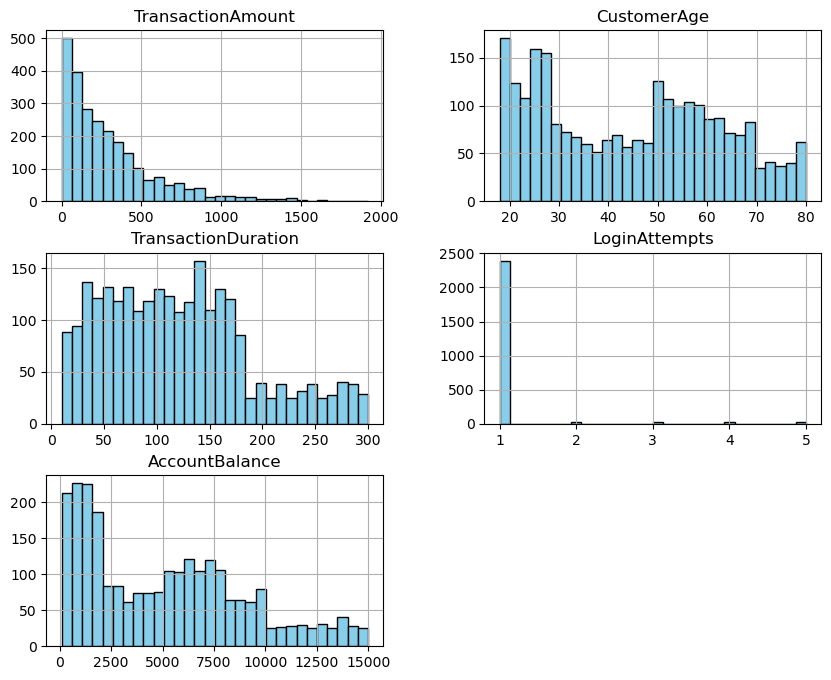

In [91]:
plt.figure(figsize=(8, 6))
num.hist(bins=30, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.show()

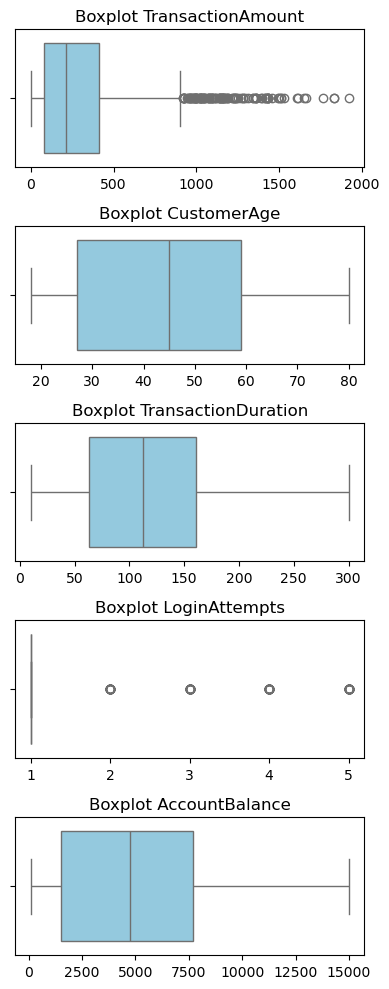

In [92]:
num_cols = num.columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(4, 2 * len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(x=num[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot {col}', fontsize=12)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


##### Insight: 

- TransactionAmount:
    - Sebagian besar transaksi bernilai rendah (di bawah 500)
    - Terdapat beberapa outlier dengan nilai transaksi tinggi mencapai 2000
    - Distribusi miring ke kanan (right-skewed)

- CustomerAge:
    - Distribusi usia pelanggan relatif merata antara 20-80 tahun
    - Ada konsentrasi lebih tinggi pada usia 20-30 tahun dan 50-60 tahun
    - Median usia pelanggan sekitar 45 tahun

- TransactionDuration:
    - Durasi transaksi sebagian besar berkisar antara 50-150 detik/menit
    - Distribusi cukup merata dengan sedikit penurunan setelah 150

- LoginAttempts:
    - Mayoritas pengguna hanya membutuhkan 1 kali percobaan login
    - Sangat sedikit yang memerlukan 2-5 kali percobaan

- AccountBalance:
    - Terdapat konsentrasi tinggi pada saldo rendah (di bawah 2500)
    - Distribusi bimodal dengan puncak kedua di sekitar 7500
    - Saldo bervariasi hingga 15000

<Figure size 800x600 with 0 Axes>

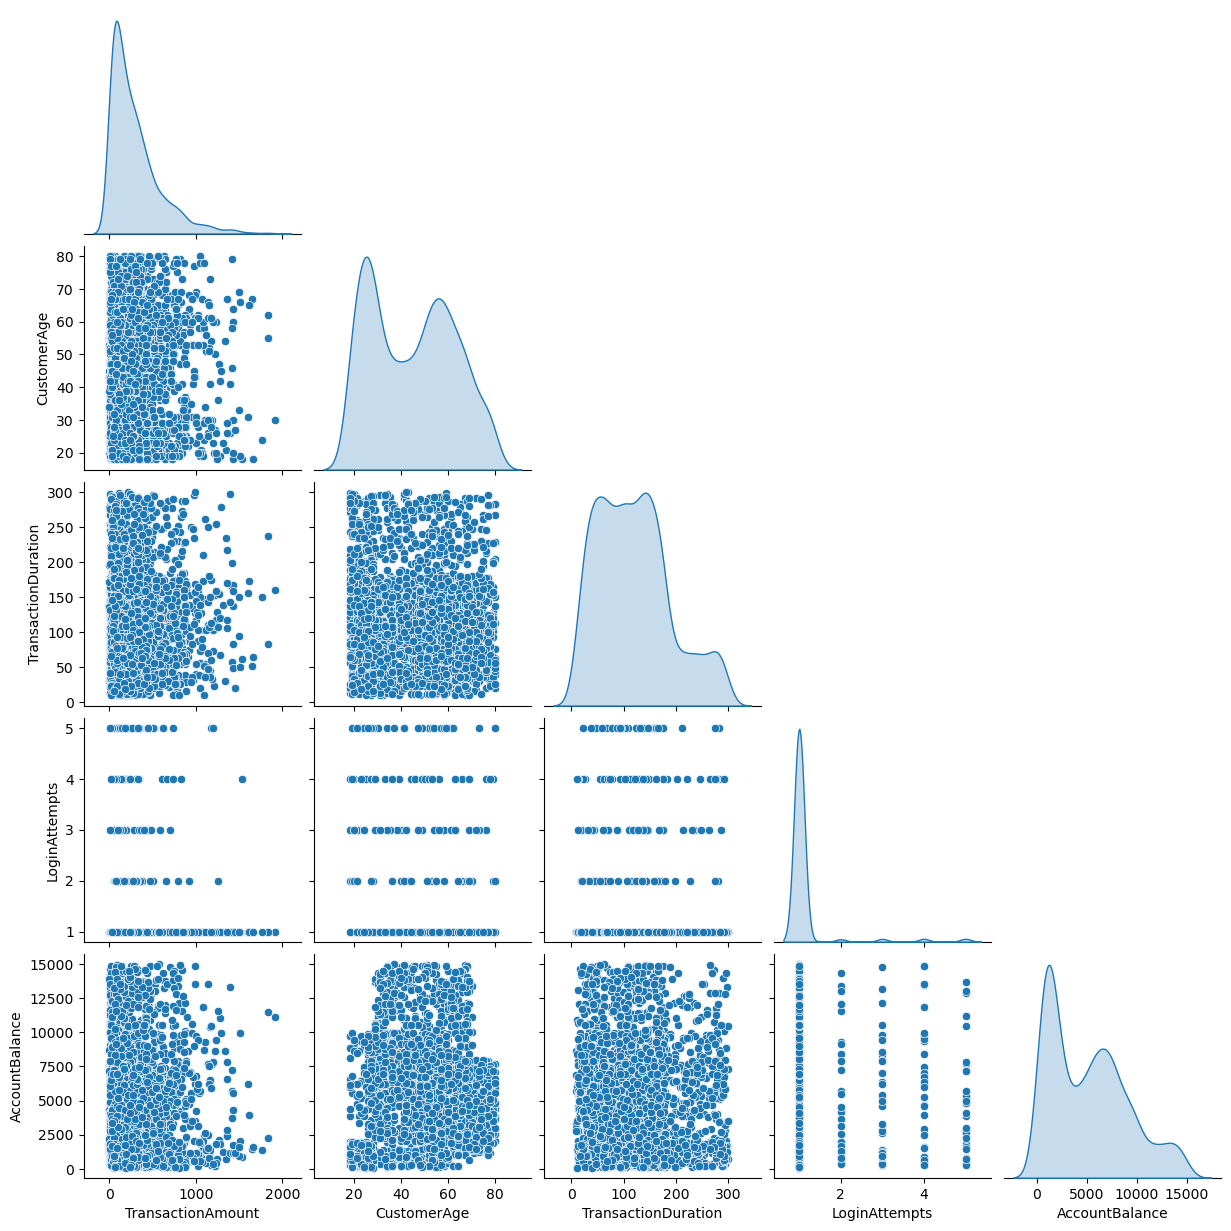

In [93]:
plt.figure(figsize=(8, 6))
sns.pairplot(num, diag_kind='kde', corner=True)
plt.show()

Pada pairplot, setiap scatterplot (plot titik biru) menunjukkan pola yang sangat acak dan menyebar, tanpa menunjukkan pola atau tren yang jelas. Ini mengindikasikan bahwa:

- Hampir tidak ada korelasi yang signifikan antar variabel yang diukur
- Titik-titik data tersebar secara acak, membentuk awan titik tanpa pola yang jelas
- Tidak terlihat adanya hubungan linear yang kuat antar variabel

> ### Visualisasi Data

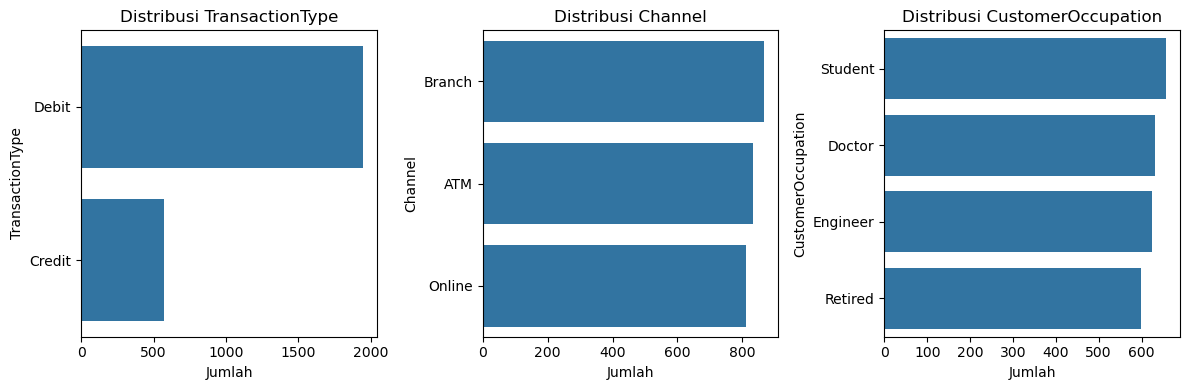

In [94]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(cat):
    plt.subplot(1, 3, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xlabel('Jumlah')

plt.tight_layout()
plt.show()

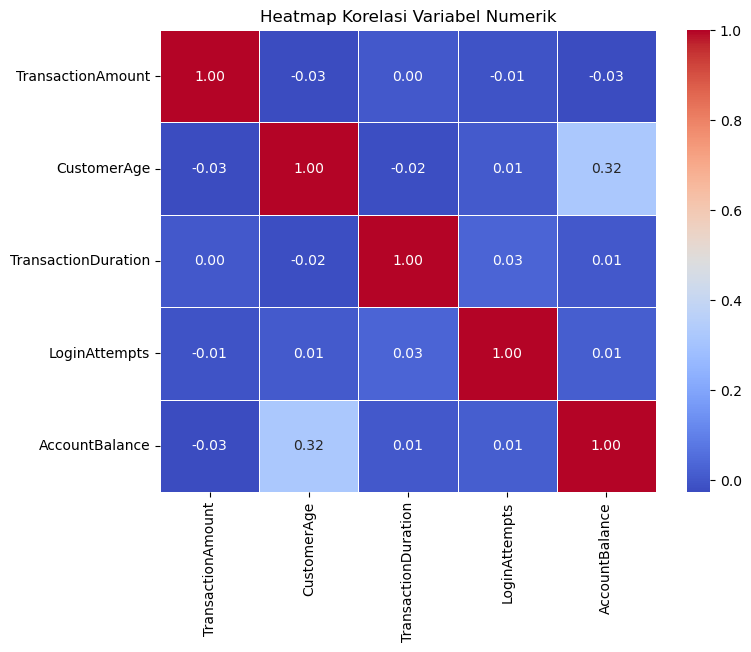

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(num.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

##### Insight:

__Distribusi TransactionType:__
- Transaksi Debit mendominasi dengan 1944 transaksi
- Transaksi Credit hanya 568 transaksi
- Rasio Debit adalah sekitar 3.4:1

__Distribusi Channel:__
- Penggunaan channel relatif merata antara Branch (868), ATM (833), dan Online (811)
- Branch sedikit lebih tinggi, menunjukkan pelanggan masih mengandalkan layanan fisik

__Distribusi CustomerOccupation:__
- Distribusi pekerjaan pelanggan cukup merata
    - Student: 657
    - Doctor: 631
    - Engineer: 625
    - Retired: 599

__Korelasi Penting:__
- Korelasi positif yang cukup kuat (0.32) antara CustomerAge dan AccountBalance, menunjukkan pelanggan yang lebih tua cenderung memiliki saldo akun lebih tinggi
- Hampir tidak ada korelasi antara TransactionAmount dengan variabel lain
- TransactionDuration dan LoginAttempts memiliki korelasi yang sangat lemah dengan variabel lain

### Insight Lain Terkait Data Transaksi Bank:

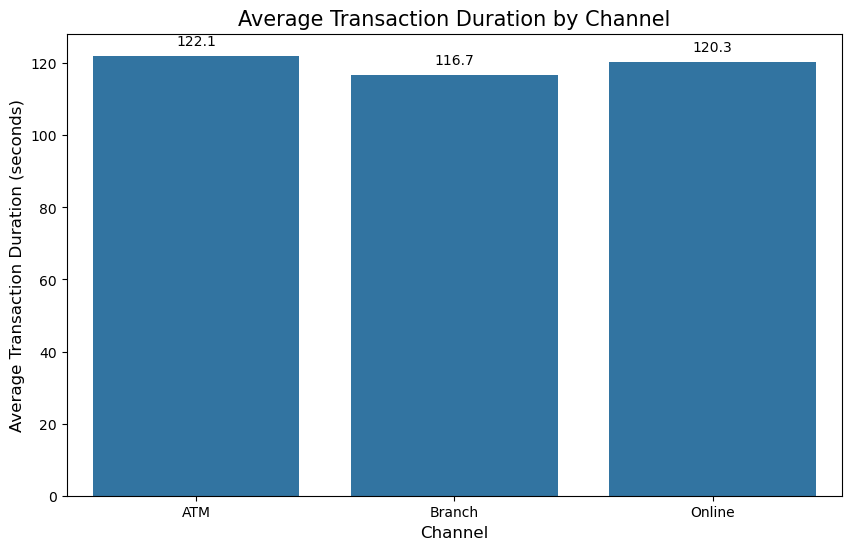

In [96]:
duration_by_channel = df.groupby('Channel')['TransactionDuration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='TransactionDuration', data=duration_by_channel)

plt.title('Average Transaction Duration by Channel', fontsize=15)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Transaction Duration (seconds)', fontsize=12)

for i, v in enumerate(duration_by_channel['TransactionDuration']):
    plt.text(i, v + 3, f'{v:.1f}', ha='center', fontsize=10)


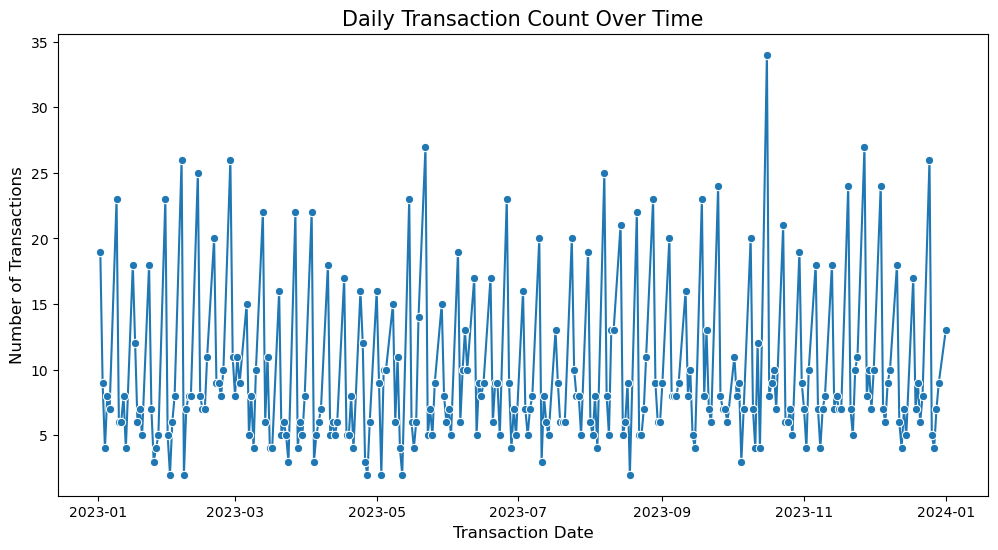

In [97]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

daily_transactions = df.groupby(df['TransactionDate'].dt.date).size().reset_index()
daily_transactions.columns = ['TransactionDate', 'TransactionCount']

plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TransactionCount', data=daily_transactions, marker='o')

plt.title('Daily Transaction Count Over Time', fontsize=15)
plt.xlabel('Transaction Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

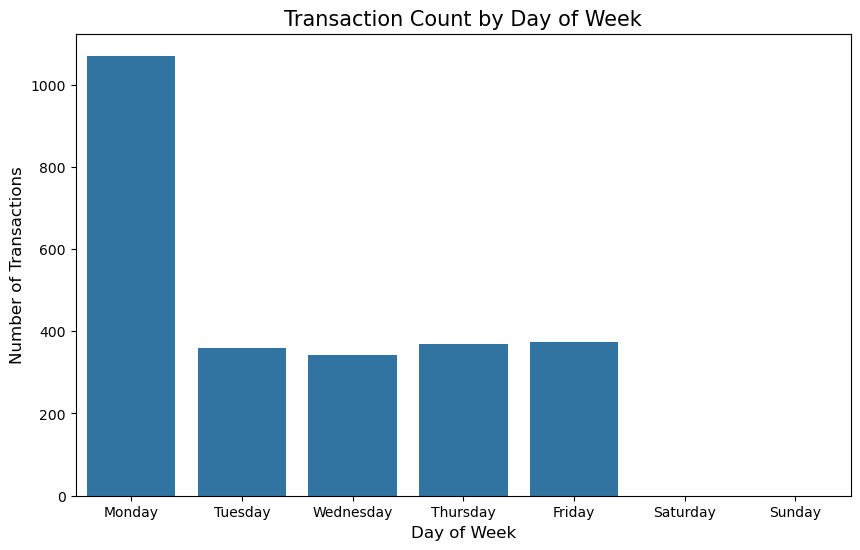

In [98]:
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
day_counts = df['DayOfWeek'].value_counts()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(days_order)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_counts.index, y=day_counts.values)

plt.title('Transaction Count by Day of Week', fontsize=15)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

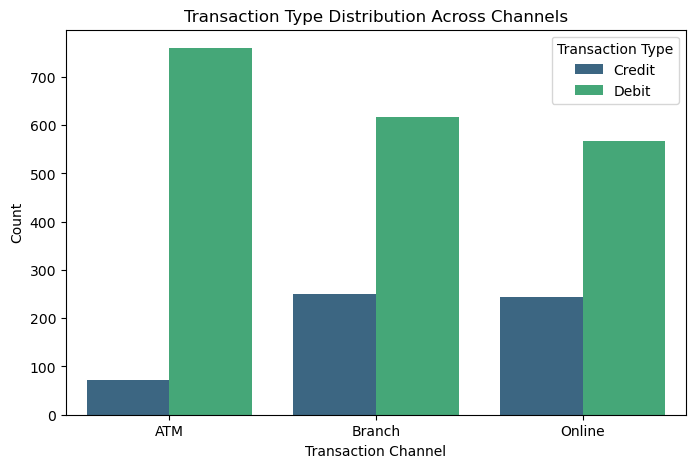

In [99]:
transaction_counts = df.groupby(['Channel', 'TransactionType']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(x='Channel', y='Count', hue='TransactionType', data=transaction_counts, palette='viridis')
plt.title('Transaction Type Distribution Across Channels')
plt.xlabel('Transaction Channel')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.show()

##### Insight: 

- Durasi Transaksi Berdasarkan Channel
    - Durasi transaksi relatif merata di semua channel dengan rentang 116-122 detik
    - Transaksi Online memiliki durasi tertinggi (120.3 detik), diikuti ATM (122.1 detik)
    - Branch memiliki durasi terendah (116.7 detik), menunjukkan efisiensi layanan tatap muka

- Pola Transaksi Harian
    - Terdapat pola fluktuasi harian yang konsisten dengan kisaran 5-25 transaksi per hari
    - Terlihat lonjakan signifikan pada Oktober 2023 dengan 34 transaksi, kemungkinan terkait hari pembayaran atau promosi
    - Pola tren mingguan terlihat dengan adanya puncak dan lembah yang berulang

- Distribusi Transaksi Berdasarkan Hari
    - Senin merupakan hari dengan jumlah transaksi tertinggi (sekitar 1100 transaksi), jauh melampaui hari lainnya
    - Selasa hingga Jumat memiliki jumlah transaksi yang relatif seragam (sekitar 350-380 transaksi)
    - Tidak ada transaksi di akhir pekan (Sabtu dan Minggu), menunjukkan operasional bank 5 hari kerja

- Tipe Transaksi Berdasarkan Channel
    - Transaksi Debit mendominasi di semua channel dibandingkan Credit
    - ATM memiliki proporsi Debit tertinggi dengan rasio hampir 10:1 (750 Debit vs 75 Credit)
    - Branch dan Online memiliki distribusi Credit yang lebih tinggi (sekitar 250 transaksi)
    - Online dan Branch menunjukkan perilaku serupa dalam komposisi tipe transaksi

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

> ### Missing Values, Duplicated Data, & Outliers Review

Berdasarkan tahapan analisis sebelumnya tidak ada duplikasi data, dan penanganan missing values sudah dilakukan di awal yaotu dengan imputasi nilai modus serta untuk deteksi outliers akan dilakukan dengan IQR method

In [100]:
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"{col} - Jumlah outlier: {count_outliers_iqr(df[col])}")

TransactionAmount - Jumlah outlier: 113
CustomerAge - Jumlah outlier: 0
TransactionDuration - Jumlah outlier: 0
LoginAttempts - Jumlah outlier: 122
AccountBalance - Jumlah outlier: 0


Terdapat Outliers yang akan ditangani dengan data scaling

#### Menghapus fitur yang tidak digunakan untuk clustering

In [101]:
df_cluster = df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'MerchantID', 
                              'Location', 'DeviceID', 'IP Address', 'PreviousTransactionDate', 'DayOfWeek'])
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   CustomerAge          2512 non-null   int64  
 4   CustomerOccupation   2512 non-null   object 
 5   TransactionDuration  2512 non-null   int64  
 6   LoginAttempts        2512 non-null   int64  
 7   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 157.1+ KB


> ### Data Scaling

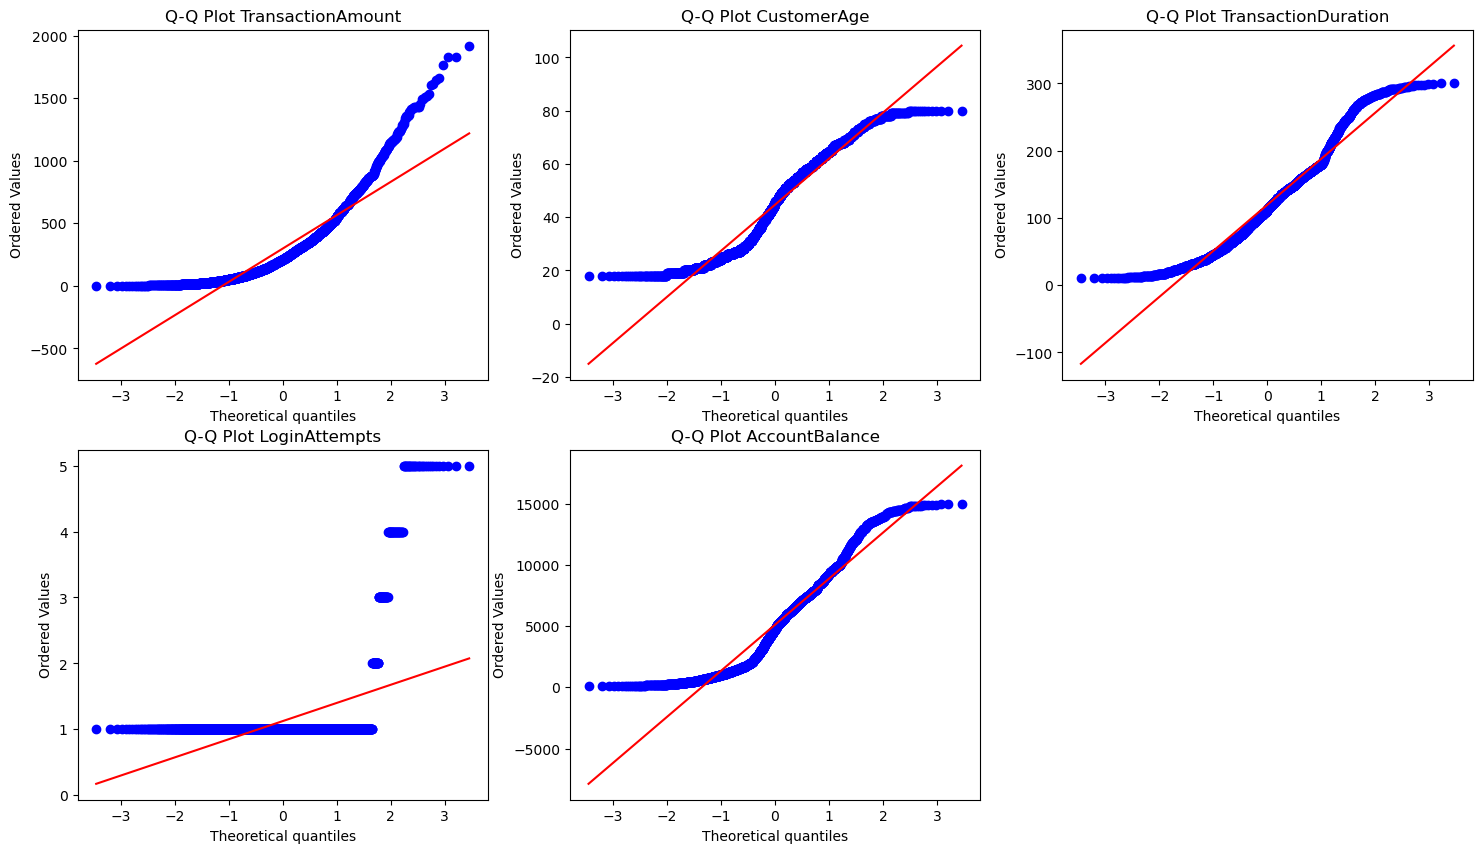

In [102]:
plt.figure(figsize=(18,10))

for i in range(5):
    plt.subplot(2,3,i+1)
    stats.probplot(df[list(num)[i]], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot {list(num)[i]}')
    
plt.show()

Berdasarkan hasil analisis menggunakan **QQ Plot**, seluruh variabel numerik dalam dataset tidak menunjukkan pola distribusi normal, yang terlihat dari ekor data yang keluar dari garis diagonal. Selain itu, terdapat outliers yang cukup signifikan pada variabel **TransactionAmount** dan **LoginAttempts**, yang dapat memengaruhi performa model jika tidak ditangani dengan baik. Oleh karena itu, metode **Yeo-Johnson Scaling** dipilih untuk transformasi data. Metode ini memiliki beberapa keunggulan, yaitu mampu menangani data dengan nilai nol atau negatif, lebih robust terhadap outliers dibandingkan metode lain seperti Box-Cox, serta membantu menstabilkan varians dan mengurangi skewness pada distribusi data. Dengan penerapan **Yeo-Johnson Scaling**, diharapkan distribusi data menjadi lebih mendekati normal sehingga model yang digunakan dapat bekerja secara lebih optimal.

In [103]:
cat = ['TransactionType', 'Channel', 'CustomerOccupation']

df_cluster = pd.get_dummies(df_cluster, columns=cat)
df_cluster.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,70,81,1,5112.21,False,True,True,False,False,True,False,False,False
1,376.24,68,141,1,13758.91,False,True,True,False,False,True,False,False,False
2,126.29,19,56,1,1122.35,False,True,False,False,True,False,False,False,True
3,184.50,26,25,1,8569.06,False,True,False,False,True,False,False,False,True
4,13.45,26,198,1,7429.40,True,False,False,False,True,False,False,False,True


Karena fitur kategorik tersebut bersifat nominal atau tidak memiliki hubungan urutan antar kelas maka dilakukan one-hot encoding

In [104]:
scaler = PowerTransformer('yeo-johnson')

df_cluster_scaled = df_cluster.copy()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

df_cluster_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.740181,1.331601,-0.419018,-0.225934,0.262845,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128
1,0.606439,1.244569,0.445572,-0.225934,1.670040,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128
2,-0.399350,-1.607342,-0.882445,-0.225934,-1.080450,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309
3,-0.080648,-1.058239,-1.653655,-0.225934,0.930348,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309
4,-1.760804,-1.058239,1.096135,-0.225934,0.732513,1.850010,-1.850010,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

##### **Algoritma Clustering:**

_K-Means++_

Metode KMeans++ digunakan dalam proses clustering untuk mengoptimalkan inisialisasi centroid. Pendekatan ini bertujuan untuk mengurangi risiko terjebak pada local optimum serta mempercepat konvergensi algoritma. Dengan pemilihan titik awal yang lebih strategis, KMeans++ menghasilkan klaster yang lebih stabil dan representatif dibandingkan dengan inisialisasi acak pada KMeans konvensional.

In [105]:
kmeans_model = KMeans(n_clusters=2, init="k-means++", random_state=100, n_init=100)
df_cluster_scaled["Cluster"] = kmeans_model.fit_predict(df_cluster_scaled)
df_cluster_scaled["Cluster"].value_counts()

Cluster
0    1855
1     657
Name: count, dtype: int64

Penentuan jumlah klusternya masih inisialisasi sembarang, pada cell selanjutnya akan dievaluasi berdasarkan elbow method dan grafik skor silhouette

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

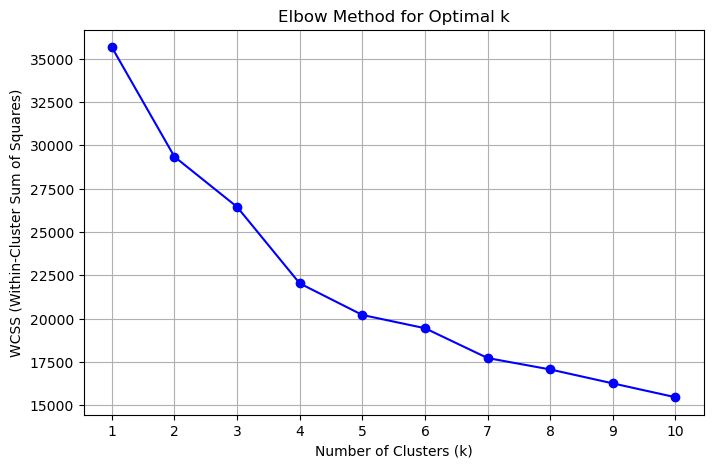

In [106]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.xticks(K_range)
plt.grid(True)
plt.show()

Dari grafik "Elbow Method for Optimal k" yang ditampilkan, memang terlihat bahwa penentuan nilai k optimal dengan metode visual saja cukup sulit. Grafik menunjukkan penurunan Within-Cluster Sum of Squares (WCSS) seiring bertambahnya jumlah cluster (k), namun tidak terlihat titik elbow yang jelas.

Penurunan nilai WCSS cukup tajam dari k=1 hingga k=3, Namun, tidak ada "siku" yang benar-benar jelas untuk dijadikan patokan. Oleh karena itu, pendekatan yang lebih sistematis dengan menghitung skor validitas cluster seperti Silhouette Scoreuntuk nilai k dari 2 hingga 10 akan lebih membantu dalam menentukan jumlah cluster optimal.

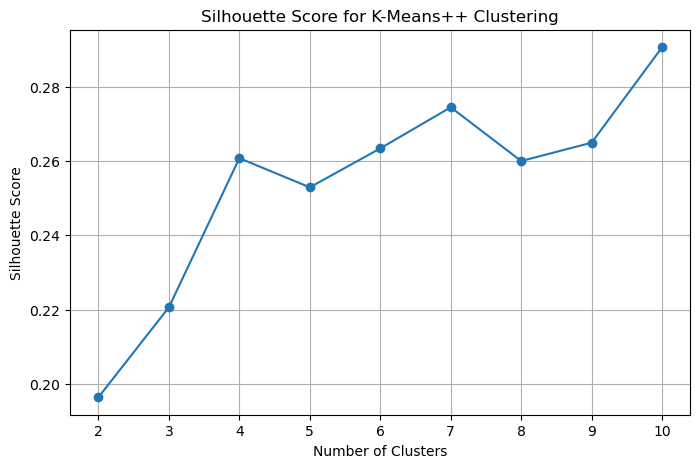

Best K: 10, Best Silhouette Score: 0.2906


In [107]:
score_list = []
K_range = range(2, 11)
best_k = None
best_score = -1

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=100, n_init=100)
    labels = kmeans.fit_predict(df_cluster_scaled)
    score = silhouette_score(df_cluster_scaled, labels)
    score_list.append(score)

    if score > best_score:
        best_score = score
        best_k = k

plt.figure(figsize=(8, 5))
plt.plot(K_range, score_list, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means++ Clustering')
plt.grid()
plt.show()

print(f"Best K: {best_k}, Best Silhouette Score: {best_score:.4f}")

_Hasil clustering menunjukkan bahwa jumlah klaster terbaik adalah 10, dengan silhouette score sebesar 0.2906. Nilai ini mengindikasikan bahwa pemisahan antar klaster masih kurang optimal, kemungkinan disebabkan oleh overlap antar data atau fitur yang kurang informatif._

_Untuk meningkatkan kualitas clustering, selanjutnya akan dilakukan Feature Selection menggunakan Variance Threshold untuk menghilangkan fitur dengan variabilitas rendah, serta UMAP untuk mereduksi dimensi fitur._

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

> ### Variance Treshold

Seleksi pertama-tama dilakukan pada dataset sebelum dilakukan Yeo-Johnson Scaling menggunakan Variance Threshold. Hal ini dilakukan karena scaling dapat mengubah nilai varians dari fitur, yang dapat menyebabkan fitur dengan varians rendah tetap dipertahankan secara tidak tepat.

In [108]:
selector = VarianceThreshold(0.2)

df_selected = selector.fit_transform(df_cluster)
selected_columns = df_cluster.columns[selector.get_support()]
selected_columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'Channel_ATM', 'Channel_Branch',
       'Channel_Online'],
      dtype='object')

In [109]:
eliminated_columns = df_cluster.columns[~selector.get_support()]
print("Variabel yang dieliminasi:", eliminated_columns.tolist())

Variabel yang dieliminasi: ['TransactionType_Credit', 'TransactionType_Debit', 'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer', 'CustomerOccupation_Retired', 'CustomerOccupation_Student']


Threshold sebesar **0.2** dipilih agar hanya fitur dengan varians yang sangat rendah yang dieliminasi, sementara fitur yang masih memiliki kontribusi informasi tetap dipertahankan. Nilai ini ditetapkan untuk menghindari kehilangan fitur yang masih dapat memberikan perbedaan antar pengamatan, tetapi juga cukup selektif dalam menghilangkan fitur yang hampir konstan. Dalam proses ini, fitur dengan variansi di bawah threshold **0.2** dieliminasi karena dianggap kurang memberikan informasi yang signifikan dalam analisis clustering.

In [110]:
df_cluster_selected_scaled = pd.DataFrame(df_cluster_scaled, columns=selected_columns)
df_cluster_selected_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online
0,-1.740181,1.331601,-0.419018,-0.225934,0.262845,1.419720,-0.726623,-0.690491
1,0.606439,1.244569,0.445572,-0.225934,1.670040,1.419720,-0.726623,-0.690491
2,-0.399350,-1.607342,-0.882445,-0.225934,-1.080450,-0.704364,-0.726623,1.448244
3,-0.080648,-1.058239,-1.653655,-0.225934,0.930348,-0.704364,-0.726623,1.448244
4,-1.760804,-1.058239,1.096135,-0.225934,0.732513,-0.704364,-0.726623,1.448244


In [111]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
df_umap = umap_reducer.fit_transform(df_cluster_selected_scaled)

c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Rasen\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP dipilih sebagai metode reduksi dimensi karena mampu mempertahankan struktur lokal dan global data dengan baik dibandingkan metode lain seperti PCA. Selain itu, UMAP lebih efektif dalam menangani data berdimensi tinggi serta dapat membantu meningkatkan kualitas clustering dengan memisahkan kelompok data yang lebih jelas. Metode ini juga tidak mengasumsikan linearitas dalam data, sehingga lebih fleksibel dalam menangani pola kompleks yang mungkin ada dalam dataset transaksi ini.

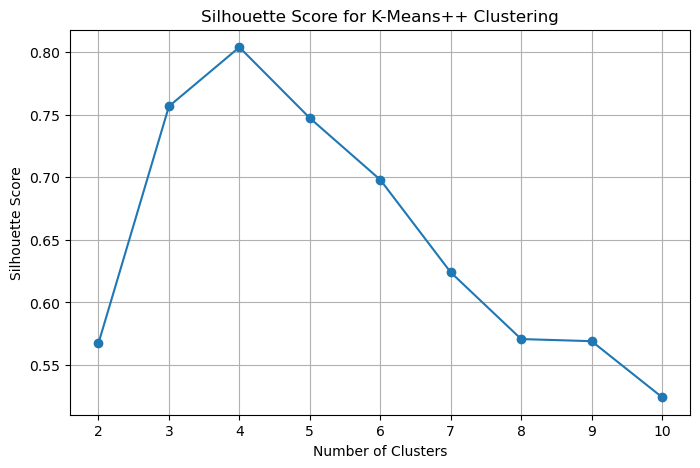

Best K: 4, Best Silhouette Score: 0.8040


In [112]:
score_list = []
K_range = range(2, 11)
best_k = None
best_score = -1

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=100, n_init=100)
    labels = kmeans.fit_predict(df_umap)
    score = silhouette_score(df_umap, labels)
    score_list.append(score)

    if score > best_score:
        best_score = score
        best_k = k

plt.figure(figsize=(8, 5))
plt.plot(K_range, score_list, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means++ Clustering')
plt.grid()
plt.show()

print(f"Best K: {best_k}, Best Silhouette Score: {best_score:.4f}")

Setelah dilakukan preprocessing menggunakan Variance Threshold untuk seleksi fitur, Yeo-Johnson Scaling untuk penyesuaian distribusi data, dan UMAP untuk reduksi dimensi, hasil clustering dengan K-Means++ menunjukkan bahwa jumlah klaster optimal adalah 4, dengan Silhouette Score sebesar 0.8040. Nilai ini berada di atas ambang batas 0.7, yang menunjukkan bahwa hasil clustering memiliki pemisahan antar klaster yang baik dan struktur yang jelas dalam data.

## **d. Visualisasi Hasil Clustering**

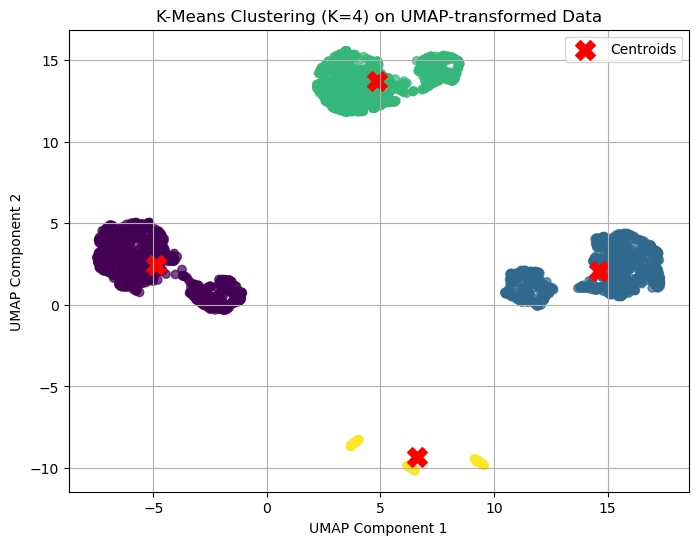

In [113]:
kmeans = KMeans(n_clusters=4, random_state=100, n_init=100)
cluster_labels = kmeans.fit_predict(df_umap)

plt.figure(figsize=(8,6))
plt.scatter(df_umap[:, 0], df_umap[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("K-Means Clustering (K=4) on UMAP-transformed Data")
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan visualisasi K-Means Clustering (K=4) pada data yang telah ditransformasi menggunakan UMAP, terlihat beberapa pola yang jelas:

1. Terdapat 4 cluster yang terbentuk dengan pemisahan yang cukup jelas, ditandai dengan warna berbeda (ungu, hijau, biru, dan kuning)

2. Cluster ungu (di sebelah kiri) dan cluster hijau (di bagian atas) memiliki densitas yang tinggi dan ukuran yang relatif besar

3. Cluster biru (di kanan) juga memiliki ukuran yang cukup besar dengan beberapa sub-kelompok yang terlihat

4. Cluster kuning (di bagian bawah) merupakan cluster terkecil dengan distribusi yang lebih tersebar dan terpisah menjadi dua area kecil, __kluster ini terindikasi potensi adanya anomali.__

5. Centroid (ditandai dengan tanda silang merah) terdistribusi dengan baik mewakili masing-masing cluster

Transformasi UMAP berhasil memisahkan data ke dalam kelompok-kelompok yang distingtif, menunjukkan bahwa K=4 kemungkinan merupakan jumlah cluster yang tepat untuk data ini. Kelompok-kelompok ini mungkin mewakili segmen pelanggan atau pola transaksi yang berbeda yang dapat digunakan untuk strategi bisnis yang lebih terarah.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

---------------------

In [114]:
df_cluster_selected_scaled["Cluster"] = kmeans.labels_

#### Membuat DataFrame baru dari df_cluster_encoded yang sudah di-inverse

In [115]:
df_inverse = df_cluster_selected_scaled.drop(columns=["Cluster"])
for col in df_cluster.columns:
    if col not in df_inverse.columns:
        df_inverse[col] = 0  

df_inverse = df_inverse[df_cluster.columns]

df_original_scale = pd.DataFrame(
    scaler.inverse_transform(df_inverse),  
    columns=df_cluster.columns
)

df_original_scale = df_original_scale[selected_columns]
df_original_scale["Cluster"] = df_cluster_selected_scaled["Cluster"]
df_original_scale.head()

c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:3453: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online,Cluster
0,14.09,70.0,81.0,1.0,5112.21,1.0,0.0,0.0,1
1,376.24,68.0,141.0,1.0,13758.91,1.0,0.0,0.0,1
2,126.29,19.0,56.0,1.0,1122.35,0.0,0.0,1.0,2
3,184.50,26.0,25.0,1.0,8569.06,0.0,0.0,1.0,2
4,13.45,26.0,198.0,1.0,7429.40,0.0,0.0,1.0,2


One-hot encoding **tidak perlu dibalikkan** karena representasi ini hanya mengubah kategori menjadi format numerik yang dapat digunakan oleh model, tanpa kehilangan informasi. Selain itu, mengembalikan hasil one-hot encoding ke bentuk aslinya memerlukan identifikasi kolom mana yang aktif (bernilai 1), yang tidak selalu diperlukan untuk interpretasi hasil clustering.

In [116]:
df_original_scale.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online,Cluster
count,2512.000000,2512.000000,2512.000000,2512.0,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,inf,5114.302966,0.331608,0.345541,0.322850,1.073646
std,291.946243,17.792198,69.963757,NaN,3900.942499,0.470885,0.475639,0.467659,0.909128
min,0.260000,18.000000,10.000000,1.0,101.250000,0.000000,0.000000,0.000000,0.000000
25%,81.885000,27.000000,63.000000,1.0,1504.370000,0.000000,0.000000,0.000000,0.000000
50%,211.140000,45.000000,112.500000,1.0,4735.510000,0.000000,0.000000,0.000000,1.000000
75%,414.527500,59.000000,161.000000,1.0,7678.820000,1.000000,1.000000,1.000000,2.000000
max,1919.110000,80.000000,300.000000,inf,14977.990000,1.000000,1.000000,1.000000,3.000000


In [117]:
df_original_scale["LoginAttempts"] = df["LoginAttempts"]

Nilai inf pada variabel LoginAttempts kemungkinan muncul saat proses inverse transform dari Yeo-Johnson. Yeo-Johnson dapat menghasilkan nilai ekstrem ketika diterapkan pada data yang awalnya memiliki distribusi tertentu, terutama jika ada nilai nol atau sangat kecil. Untuk mengatasinya, nilai inf dan -inf akan diganti dengan nilai asli LoginAttempts saat sebelum discaling. Dengan cara ini, data tetap valid tanpa kehilangan informasi yang signifikan.

----------------------------------

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [118]:
df_original_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   CustomerAge          2512 non-null   float64
 2   TransactionDuration  2512 non-null   float64
 3   LoginAttempts        2512 non-null   int64  
 4   AccountBalance       2512 non-null   float64
 5   Channel_ATM          2512 non-null   float64
 6   Channel_Branch       2512 non-null   float64
 7   Channel_Online       2512 non-null   float64
 8   Cluster              2512 non-null   int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 166.9 KB


In [119]:
result = pd.DataFrame(index=df_original_scale.columns.drop('Cluster'), columns=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

for cluster in range(4):
    result[f'Cluster {cluster}'] = df_original_scale[df_original_scale['Cluster'] == cluster].mean()

result = result.round(3)
result


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
TransactionAmount,288.200,307.665,298.743,289.106
CustomerAge,44.663,45.037,44.236,45.172
TransactionDuration,116.330,121.596,119.615,129.738
LoginAttempts,1.000,1.000,1.000,3.566
AccountBalance,5229.686,4967.758,5077.778,5507.877
Channel_ATM,0.000,1.000,0.000,0.361
Channel_Branch,1.000,0.000,0.000,0.311
Channel_Online,0.000,0.000,1.000,0.328


## **Analisis Karakteristik Cluster dari Model KMeans**  

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.  

### **Cluster 0: Moderate Transactions**  
- **Rata-rata Jumlah Transaksi:** 288.2  
- **Rata-rata Usia Pelanggan:** 44.66 tahun  
- **Durasi Transaksi:** 116.33 detik (terpendek)  
- **Jumlah Login Attempts:** 1 kali (terendah)  
- **Saldo Rata-rata:** 5229.69 (cukup tinggi)  
- **Saluran Dominan:** Branch (100%)  

**Analisis:**  
Cluster ini terdiri dari pelanggan dengan transaksi bernilai sedang dan saldo yang relatif tinggi. Mereka cenderung menggunakan cabang bank untuk bertransaksi dan hanya mencoba login sekali. Dengan durasi transaksi yang lebih cepat dibandingkan cluster lain, pelanggan dalam kelompok ini kemungkinan memiliki pengalaman transaksi yang lebih efisien.  

### **Cluster 1: High Transactions**  
- **Rata-rata Jumlah Transaksi:** 307.67 (tertinggi)  
- **Rata-rata Usia Pelanggan:** 45.04 tahun  
- **Durasi Transaksi:** 121.60 detik  
- **Jumlah Login Attempts:** 1 kali (terendah)  
- **Saldo Rata-rata:** 4967.76  
- **Saluran Dominan:** ATM (100%)  

**Analisis:**  
Cluster ini mencakup pelanggan yang lebih sering bertransaksi dengan jumlah yang lebih tinggi dibandingkan cluster lain. Mereka hampir seluruhnya menggunakan ATM, menunjukkan preferensi terhadap metode perbankan yang lebih mandiri dibandingkan layanan di cabang.  

### **Cluster 2: Online Users**  
- **Rata-rata Jumlah Transaksi:** 298.74  
- **Rata-rata Usia Pelanggan:** 44.24 tahun  
- **Durasi Transaksi:** 119.61 detik  
- **Jumlah Login Attempts:** 1 kali (terendah)  
- **Saldo Rata-rata:** 5077.78  
- **Saluran Dominan:** Online (100%)  

**Analisis:**  
Pelanggan dalam cluster ini adalah pengguna aktif layanan perbankan digital. Mereka cenderung melakukan transaksi melalui layanan online banking, dengan durasi transaksi yang hampir sama dengan cluster lainnya. Pola ini menunjukkan ketergantungan tinggi terhadap teknologi untuk transaksi finansial.  

### **Cluster 3: Anomalous Pattern**  
- **Rata-rata Jumlah Transaksi:** 289.11  
- **Rata-rata Usia Pelanggan:** 45.17 tahun  
- **Durasi Transaksi:** 129.74 detik (tertinggi)  
- **Jumlah Login Attempts:** 3.57 kali (tertinggi)  
- **Saldo Rata-rata:** 5507.88 (tertinggi)  
- **Saluran Dominan:** Beragam (ATM, Branch, Online)  

**Analisis:**  
Cluster ini menunjukkan pola yang berbeda dari cluster lainnya, dengan jumlah percobaan login yang jauh lebih tinggi dibandingkan cluster lain. Durasi transaksi yang lebih lama dan distribusi penggunaan saluran yang lebih merata mengindikasikan kemungkinan adanya aktivitas tidak biasa atau anomali. Pola ini bisa terjadi pada pengguna yang sering mengalami kendala login atau berpotensi terkait dengan upaya akses mencurigakan.  

### **Kesimpulan**  
Dari hasil clustering, terlihat bahwa **Cluster 0, 1, dan 2 memiliki pola transaksi yang jelas berdasarkan preferensi saluran perbankan** (Branch, ATM, atau Online). Namun, **Cluster 3 tampak berbeda dengan jumlah login attempts yang jauh lebih tinggi**, yang dapat mengindikasikan adanya **potensi anomali atau pelanggan yang mengalami kesulitan dalam mengakses layanan perbankan**.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [120]:
df_original_scale.to_csv('Dataset_clustering.csv', index=False)